# Import Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load Dataset

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
ndata = pd.read_excel('/content/drive/MyDrive/Atlanta/Week 6 Training/Week 6 Project/Data/Twitter/Nike_Intention_To_Buy_HandLabel.xlsx')

In [4]:
ndata.shape

(527, 5)

In [5]:
ndata.head()

,Unnamed: 0,created_at,id,text,Sent
0,1,2021-09-05T00:55:25.000Z,1.434319e+18,@jadendaly @Jumpman23 @nikestore @Nike @nikeba...,2.0
1,2,2021-09-05T00:55:05.000Z,1.434319e+18,"Some personal news: After almost 8 years, Iâ€™...",2.0
2,3,2021-09-05T00:43:13.000Z,1.434316e+18,@DCUO_Cire @Cookingnoodles1 @nikestore @Jumpma...,3.0
3,4,2021-09-05T00:41:01.000Z,1.434316e+18,@Nike It's not allowing me to DM you. @nikesto...,1.0
4,5,2021-09-05T00:35:02.000Z,1.434314e+18,@geejmasterflex @FedEx @Nike @FedExHelp @LT_56...,2.0


# Table Format Pre-Processing

In [6]:
# Deleting the id as we don't require them

ndata.drop(ndata.columns[2], axis=1, inplace=True)

In [7]:
# Checking the Unique values in the data as there are multiples retweets for same tweet

ndata.nunique()

Unnamed: 0    527
created_at    522
text          526
Sent            4
dtype: int64

In [8]:
ndata.head()

,Unnamed: 0,created_at,text,Sent
0,1,2021-09-05T00:55:25.000Z,@jadendaly @Jumpman23 @nikestore @Nike @nikeba...,2.0
1,2,2021-09-05T00:55:05.000Z,"Some personal news: After almost 8 years, Iâ€™...",2.0
2,3,2021-09-05T00:43:13.000Z,@DCUO_Cire @Cookingnoodles1 @nikestore @Jumpma...,3.0
3,4,2021-09-05T00:41:01.000Z,@Nike It's not allowing me to DM you. @nikesto...,1.0
4,5,2021-09-05T00:35:02.000Z,@geejmasterflex @FedEx @Nike @FedExHelp @LT_56...,2.0


In [9]:
#  Seperating the Date and Time into two different columns

ndata['Date'] = pd.to_datetime(ndata['created_at']).dt.date
ndata['Time'] = pd.to_datetime(ndata['created_at']).dt.time



In [10]:
#  Dropping the created_at Columns as its not required anymore
ndata.drop(ndata.columns[1], axis=1, inplace=True)

In [11]:
# Resetting the index and the putting the columns names
#ndata.reset_index(level = 0, inplace=True)
ndata.columns = ['Post_id','Post', 'Intention','Date', 'Time']

In [12]:
ndata.head()

,Post_id,Post,Intention,Date,Time
0,1,@jadendaly @Jumpman23 @nikestore @Nike @nikeba...,2.0,2021-09-05,00:55:25
1,2,"Some personal news: After almost 8 years, Iâ€™...",2.0,2021-09-05,00:55:05
2,3,@DCUO_Cire @Cookingnoodles1 @nikestore @Jumpma...,3.0,2021-09-05,00:43:13
3,4,@Nike It's not allowing me to DM you. @nikesto...,1.0,2021-09-05,00:41:01
4,5,@geejmasterflex @FedEx @Nike @FedExHelp @LT_56...,2.0,2021-09-05,00:35:02


In [13]:
ndata.isnull().sum().sum()

4

In [14]:
ndata = ndata.dropna(how='any',axis=0) 

In [15]:
ndata.value_counts(subset='Intention')

Intention
3.0    267
2.0    141
1.0     76
4.0     42
dtype: int64

In [16]:
ndata.dtypes

Post_id        int64
Post          object
Intention    float64
Date          object
Time          object
dtype: object

In [17]:
# Converting the Post to string type for our analysis

ndata.Post = ndata.Post.astype(str)

# EDA

In [18]:
max([len(post) for post in ndata['Post']])

330

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


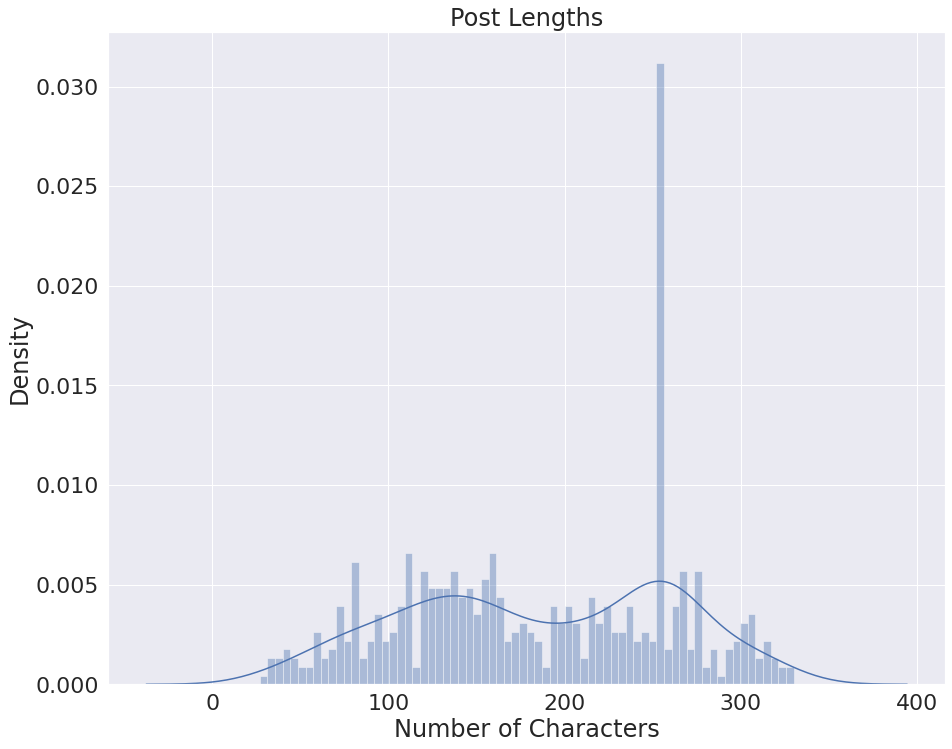

In [19]:
plt.figure(figsize=(15,12))
sns.set(font_scale=2)
sns.distplot([len(post) for post in ndata['Post']], bins=70)
plt.title("Post Lengths")
plt.xlabel('Number of Characters')
plt.show();

# Text Pre-Processing

### Preprocess the Post Column

In [20]:
#Preprocess the Post from each tweet ( cleaning the text)

import re

def preprocess_text(sentence):
    #removal of HTTP links/URLs mixed up in any text
    sentence = re.sub('http://\S+|https://\S+', '', str(sentence))
    
    #removal of any references outside the text
    sentence = re.sub("[\(\[].*?[\)\]]", "", str(sentence))
    
    #removal of newline characters
    sentence = re.sub('\n',' ',str(sentence))
    sentence = re.sub('\n','',str(sentence))
    
    #removal of apostrophers
    sentence = re.sub("'s",'',str(sentence))
    
    #removal of numbers in pargraphs
    sentence = re.sub('[0-9]+.\t','',str(sentence))
    
    #removal of hyphens in any sentences
    sentence = re.sub("-",' ',str(sentence))
    sentence = re.sub("— ",'',str(sentence))
    
    #removal of salutations in the sentences
    sentence = re.sub("Mr\.",'Mr',str(sentence))
    sentence = re.sub("Mrs\.",'Mrs',str(sentence))
    
    #removal of quation marks in the sentences
    sentence = re.sub('\"','',str(sentence))
    
    return sentence

ndata['Post'] = ndata["Post"].apply(preprocess_text)
ndata.head()

,Post_id,Post,Intention,Date,Time
0,1,@jadendaly @Jumpman23 @nikestore @Nike @nikeba...,2.0,2021-09-05,00:55:25
1,2,"Some personal news: After almost 8 years, Iâ€™...",2.0,2021-09-05,00:55:05
2,3,@DCUO_Cire @Cookingnoodles1 @nikestore @Jumpma...,3.0,2021-09-05,00:43:13
3,4,@Nike It not allowing me to DM you. @nikestore...,1.0,2021-09-05,00:41:01
4,5,@geejmasterflex @FedEx @Nike @FedExHelp @LT_56...,2.0,2021-09-05,00:35:02


### De-contract Words

In [21]:
!pip install contractions
import contractions

     |████████████████████████████████| 284 kB 13.2 MB/s 
     |████████████████████████████████| 321 kB 43.1 MB/s 
  Created wheel for pyahocorasick: filename=pyahocorasick-1.4.2-cp37-cp37m-linux_x86_64.whl size=85445 sha256=c323e737387c5547fab66eb61871d3eec9f7af1e518fd18bf4651bad373740ed
  Stored in directory: /root/.cache/pip/wheels/25/19/a6/8f363d9939162782bb8439d886469756271abc01f76fbd790f
Successfully built pyahocorasick


In [22]:
def replace_contractions(text):
  return contractions.fix(text)

In [23]:
ndata1 = ndata.copy()

In [24]:
for i, post in enumerate(ndata['Post']):
  ndata1['Post'][i] = replace_contractions(post)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [25]:
ndata1.head()

,Post_id,Post,Intention,Date,Time
0,1,@jadendaly @Jumpman23 @nikestore @Nike @nikeba...,2.0,2021-09-05,00:55:25
1,2,"Some personal news: After almost 8 years, Iâ€™...",2.0,2021-09-05,00:55:05
2,3,@DCUO_Cire @Cookingnoodles1 @nikestore @Jumpma...,3.0,2021-09-05,00:43:13
3,4,@Nike It not allowing me to DM you. @nikestore...,1.0,2021-09-05,00:41:01
4,5,@geejmasterflex @FedEx @Nike @FedExHelp @LT_56...,2.0,2021-09-05,00:35:02


### Remove Numericals

In [26]:
import re

def remove_numbers(post):
  post = re.sub(r'\d+', '', post)
  return post

In [27]:
ndata1['Post'] = ndata1['Post'].apply(lambda x: remove_numbers(x))

### Tokenization

In [28]:
import nltk
from nltk.tokenize.toktok import ToktokTokenizer

tokenizer = ToktokTokenizer()

for i, post in enumerate(ndata['Post']):
  ndata1['Post'][i] = tokenizer.tokenize(post)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys


In [29]:
ndata1.head()

,Post_id,Post,Intention,Date,Time
0,1,"[@jadendaly, @Jumpman23, @nikestore, @Nike, @n...",2.0,2021-09-05,00:55:25
1,2,"[Some, personal, news, :, After, almost, 8, ye...",2.0,2021-09-05,00:55:05
2,3,"[@DCUO_Cire, @Cookingnoodles1, @nikestore, @Ju...",3.0,2021-09-05,00:43:13
3,4,"[@Nike, It, not, allowing, me, to, DM, you., @...",1.0,2021-09-05,00:41:01
4,5,"[@geejmasterflex, @FedEx, @Nike, @FedExHelp, @...",2.0,2021-09-05,00:35:02


### Non-Ascii Characters

In [30]:
import unicodedata

def remove_non_ascii(words):
  new_words = []
  for word in words:
    new_word = unicodedata.normalize('NFKD', word).encode('ascii', 'ignore').decode('utf-8', 'ignore')
    new_words.append(new_word)
  return new_words

In [31]:
ndata1['Post'] = ndata1['Post'].apply(lambda post: remove_non_ascii(post))

In [32]:
ndata1['Post'][0]

['@jadendaly',
 '@Jumpman23',
 '@nikestore',
 '@Nike',
 '@nikebasketball',
 '@NikeNYC',
 '@adidas',
 '@adidasoriginals',
 '@adidasNYC',
 '@atmos_usa',
 '@snkrhud',
 'Love',
 'to',
 'see',
 'it.',
 'Seems',
 'like',
 'not',
 'long',
 'ago',
 'you',
 'had',
 '1',
 'of',
 'those',
 'racks',
 'filled.',
 'The',
 'growth',
 'is',
 'BEAUTIFUL',
 'brother',
 'a']

### Punctuation

In [33]:
def remove_punctuation(words):
  new_words = []
  for word in words:
    new_word = re.sub(r'[^\w\s]', '', word)
    if new_word != '':
      new_words.append(new_word)
  return new_words

In [34]:
ndata1['Post'] = ndata1['Post'].apply(lambda post: remove_punctuation(post))

In [35]:
ndata1['Post'][0]

['jadendaly',
 'Jumpman23',
 'nikestore',
 'Nike',
 'nikebasketball',
 'NikeNYC',
 'adidas',
 'adidasoriginals',
 'adidasNYC',
 'atmos_usa',
 'snkrhud',
 'Love',
 'to',
 'see',
 'it',
 'Seems',
 'like',
 'not',
 'long',
 'ago',
 'you',
 'had',
 '1',
 'of',
 'those',
 'racks',
 'filled',
 'The',
 'growth',
 'is',
 'BEAUTIFUL',
 'brother',
 'a']

### Lower Case

In [36]:
def lower_case(words):
  new_words = []
  for word in words:
    new_word = word.lower()
    new_words.append(new_word)
  return new_words

In [37]:
ndata1['Post'] = ndata1['Post'].apply(lambda post: lower_case(post))

In [38]:
ndata1.head()

,Post_id,Post,Intention,Date,Time
0,1,"[jadendaly, jumpman23, nikestore, nike, nikeba...",2.0,2021-09-05,00:55:25
1,2,"[some, personal, news, after, almost, 8, years...",2.0,2021-09-05,00:55:05
2,3,"[dcuo_cire, cookingnoodles1, nikestore, jumpma...",3.0,2021-09-05,00:43:13
3,4,"[nike, it, not, allowing, me, to, dm, you, nik...",1.0,2021-09-05,00:41:01
4,5,"[geejmasterflex, fedex, nike, fedexhelp, lt_56...",2.0,2021-09-05,00:35:02


### Stop Words

In [39]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [40]:
stopwords = nltk.corpus.stopwords.words('english')
print(stopwords)

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than', '

In [41]:
# We don't want to remove certain words like 'no' or 'not', so we take it out of the stopwords list
removed_stopwords = ['before', 'after', 'above', 'below', 'down', 'in', 'out', 'again', 'further','when', 'where', 'why', "mustn't", 'shouldn', "shouldn't", 'wasn', "wasn't", "weren't" "won't", 'wouldn', "wouldn't"]

# Lets create a function to remove the desired stopwords from stopword list

def Diff(li1, li2):
    li_dif = [i for i in li1 + li2 if i not in li1 or i not in li2]
    return li_dif


In [42]:
# lets call the function Diff to remove the desire words from stopwords list

stopwords = Diff(stopwords, removed_stopwords)

In [43]:
def remove_stopwords(words):
  new_words = []
  for word in words:
    if word not in stopwords:
      new_words.append(word)
  return new_words

In [44]:
ndata1['Post'] = ndata1['Post'].apply(lambda post: remove_stopwords(post))

In [45]:
ndata1['Post']

0      [jadendaly, jumpman23, nikestore, nike, nikeba...
1      [personal, news, after, almost, 8, years, ia, ...
2      [dcuo_cire, cookingnoodles1, nikestore, jumpma...
3      [nike, allowing, dm, nikestore, basically, tol...
4      [geejmasterflex, fedex, nike, fedexhelp, lt_56...
                             ...                        
522          [today, last, day, use, 25, nike, discount]
523    [rubbershoes, sale, yyyyyy, nike, nikerunning,...
524    [ad, steal, price, nike, jackets, sale, y , cl...
525    [nike, sportswear, downfill, parka, jacket, wo...
526    [n, k, e,  , p, r, w, e, r,  , w, n, f, l, l, ...
Name: Post, Length: 526, dtype: object

### Special Characters

In [46]:
def remove_special_characters(words):
  pattern = r'[^a-zA-z\s]'
  new_words = []
  for word in words:
    new_word = re.sub(pattern, '', word)
    new_words.append(new_word)
  return new_words

In [47]:
ndata1['Post'] = ndata1['Post'].apply(lambda post: remove_special_characters(post))

### Remove Blank Words

In [48]:
def remove_blanks(words):
  new_words = []
  for word in words:
    if word != '':
      new_words.append(word)
  return new_words

In [49]:
ndata1['Post'] = ndata1['Post'].apply(lambda post: remove_blanks(post))

In [50]:
ndata['Post'][4]

"@geejmasterflex @FedEx @Nike @FedExHelp @LT_56 Now I'm asking if @LT_56 and Clarence would help me personally authenticate and promote an auction so that I can by my wife and children a nice house. We have a home I'm a hard worker but our home is falling "

In [51]:
ndata1['Post'][4]

['geejmasterflex',
 'fedex',
 'nike',
 'fedexhelp',
 'lt_',
 'asking',
 'lt_',
 'clarence',
 'would',
 'help',
 'personally',
 'authenticate',
 'promote',
 'auction',
 'wife',
 'children',
 'nice',
 'house',
 'home',
 'hard',
 'worker',
 'home',
 'falling']

In [52]:
ndata['Post'][28]

'Got In today Sold Today  Jordan 1 Mid Racer Blue GS  Size: UK  Y US   Y Copped of Nike âœ…Deadstockâœ… Instagram: Ks.creps  Depop:  ðŸŽ‰Happy Coustomer '

In [53]:
ndata1['Post'][28]

['got',
 'in',
 'today',
 'sold',
 'today',
 'jordan',
 'mid',
 'racer',
 'blue',
 'gs',
 'size',
 'uk',
 'us',
 'copped',
 'nike',
 'deadstocka',
 'instagram',
 'kscreps',
 'depop',
 'yzhappy',
 'coustomer']

### Lemmatize

In [54]:
from nltk.stem import WordNetLemmatizer
nltk.download('wordnet')
  
lemmatizer = WordNetLemmatizer()
  
print("rocks :", lemmatizer.lemmatize("rocks"))
print("corpora :", lemmatizer.lemmatize("corpora"))

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Unzipping corpora/wordnet.zip.
rocks : rock
corpora : corpus


In [55]:
def lemmatize_words(words):
  new_words = []
  for word in words:
    new_word = lemmatizer.lemmatize(word)
    new_words.append(new_word)
  return new_words

In [56]:
ndata1['Post'] = ndata1['Post'].apply(lambda post: lemmatize_words(post))

In [57]:
ndata['Post'][45]

'@soleguru @Jumpman23 @nikestore @Nike Copped them for retail. Such an amazing pair'

In [58]:
ndata1['Post'][45]

['soleguru',
 'jumpman',
 'nikestore',
 'nike',
 'copped',
 'retail',
 'amazing',
 'pair']

# Exploration of Pre-Processed Corpus

In [59]:
from collections import Counter

top = Counter([item for sublist in ndata1['Post'] for item in sublist])
freq = pd.DataFrame(top.most_common(20))
freq.columns = ['Common_words','Count']
freq.style.background_gradient(cmap='Reds')

,Common_words,Count
0,nike,522
1,sale,136
2,in,132
3,gt,118
4,tm,84
5,air,71
6,shoe,52
7,like,48
8,u,44
9,get,44


# Intention To Buy

In [60]:
ndata2 = ndata1.copy()

In [61]:
# Converting the Post to string type for our analysis

ndata1.Intention = ndata1.Intention.astype('category')
# Converting the Post to string type for our analysis

ndata.Post = ndata.Post.astype(str)

In [62]:
ndata1.dtypes

Post_id         int64
Post           object
Intention    category
Date           object
Time           object
dtype: object

In [63]:
ndata1.head()

,Post_id,Post,Intention,Date,Time
0,1,"[jadendaly, jumpman, nikestore, nike, nikebask...",2.0,2021-09-05,00:55:25
1,2,"[personal, news, after, almost, year, ia, tmve...",2.0,2021-09-05,00:55:05
2,3,"[dcuo_cire, cookingnoodles, nikestore, jumpman...",3.0,2021-09-05,00:43:13
3,4,"[nike, allowing, dm, nikestore, basically, tol...",1.0,2021-09-05,00:41:01
4,5,"[geejmasterflex, fedex, nike, fedexhelp, lt_, ...",2.0,2021-09-05,00:35:02


### Hand Labelling

The dataset we are using has been handlabled in excel file

We'll manually label a sample of our posts, and grade them on a scale of 1 to 4:

1.   Definitely not going to make a purchase
  *   An upset customer (might need attention)
2.   Neutral
  *   Simply commenting
3.   Possibly going to purchase
  *   Product inquiry
4.   Likely to purchase
  *   Wants to know how/where to purchase product


Now, let's split our 2021 data into a subset of hand-labeled manual labels and a subset to test our model on. Within our hand-labeled subset, we'll split that into training, testing, and validation sets. We can set the rest aside as data that we can use to put our model into "production"

### Split data into Train/Test/Validation

While we kept the posts in sentence form for human readability purposes, we should feed our model tokenized words.

In [64]:
mdata = ndata1
mdata.head()

,Post_id,Post,Intention,Date,Time
0,1,"[jadendaly, jumpman, nikestore, nike, nikebask...",2.0,2021-09-05,00:55:25
1,2,"[personal, news, after, almost, year, ia, tmve...",2.0,2021-09-05,00:55:05
2,3,"[dcuo_cire, cookingnoodles, nikestore, jumpman...",3.0,2021-09-05,00:43:13
3,4,"[nike, allowing, dm, nikestore, basically, tol...",1.0,2021-09-05,00:41:01
4,5,"[geejmasterflex, fedex, nike, fedexhelp, lt_, ...",2.0,2021-09-05,00:35:02


In [65]:
concat_posts = []
for post in mdata['Post']:
  new_post = ''
  for word in post:
    new_post += ' ' + word
  new_post = new_post[1:]
  concat_posts.append(new_post)

In [66]:
mdata['Post'] = concat_posts

mdata.head()

,Post_id,Post,Intention,Date,Time
0,1,jadendaly jumpman nikestore nike nikebasketbal...,2.0,2021-09-05,00:55:25
1,2,personal news after almost year ia tmve decide...,2.0,2021-09-05,00:55:05
2,3,dcuo_cire cookingnoodles nikestore jumpman nik...,3.0,2021-09-05,00:43:13
3,4,nike allowing dm nikestore basically told noth...,1.0,2021-09-05,00:41:01
4,5,geejmasterflex fedex nike fedexhelp lt_ asking...,2.0,2021-09-05,00:35:02


In [538]:
train_data = mdata[['Post', 'Intention']]

X = train_data['Post']
y = train_data['Intention']

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3)

In [539]:
print('X_train shape: {}'.format(X_train.shape))
print('y_train shape: {}'.format(y_train.shape))
print()
print('X_test shape: {}'.format(X_test.shape))
print('y_test shape: {}'.format(y_test.shape))

X_train shape: (368,)
y_train shape: (368,)

X_test shape: (158,)
y_test shape: (158,)


In [540]:
y_test.value_counts()

3.0    76
2.0    43
1.0    28
4.0    11
Name: Intention, dtype: int64

In [541]:
X_train

67     after watching mavs falter in exciting playoff...
37     innovation new when touch sport always raise c...
490    earn bitcoin back nike big clearance sale rn f...
328    tirednobdy ooh ok here p good try find one col...
356    mentalhealth matter see amazing many others fo...
                             ...                        
519    do brand new nike air max olive green outlet sale
177                                 via nikea snkrs arey
164    surfing wave ft nike air usd rental usd purcha...
97     amazing hoursa first w nike snkrs app picked m...
262    nike shoebox bag orange sale free shipping lin...
Name: Post, Length: 368, dtype: object

### Modeling

We'll go with a multiclass neural net, with an output layer of 4 neurons (for 4 classes of intentions).

In [542]:
import tensorflow as tf
import tensorflow_hub as hub
from tensorflow import keras

In [644]:
# An instance of a sequential neural; an empty model
model = tf.keras.Sequential()

We need to use an embedder to transform the data into a vector space that the neural net can handle.

In [544]:
embedding = "https://tfhub.dev/google/tf2-preview/gnews-swivel-20dim/1"
# embedding = "https://tfhub.dev/google/nnlm-en-dim128/2"
# embedding = "https://tfhub.dev/google/nnlm-en-dim50-with-normalization/2"
hub_layer = hub.KerasLayer(embedding, input_shape = [], dtype = tf.string, trainable = True)

Note that the nature of this model means that we'll use softmax as the activation function of our output layer.

In [645]:
model.add(hub_layer)
# model.add(tf.keras.layers.Dense(8, activation = 'relu'))
# model.add(tf.keras.layers.Dense(64, activation = 'relu'))
model.add(tf.keras.layers.Dense(32, activation = 'relu'))
model.add(tf.keras.layers.Dropout(.7))
# model.add(tf.keras.layers.Dropout(.5))
model.add(tf.keras.layers.Dense(32, input_dim = 4, activation = 'relu'))
model.add(tf.keras.layers.Dense(4, activation = 'softmax'))

In [646]:
import keras.utils

In [647]:
y_train_hot = tf.keras.utils.to_categorical(y_train, 5)

In [648]:
y_train_hot = pd.DataFrame(y_train_hot).drop(0, axis=1).to_numpy()

In [649]:
model.compile(optimizer= 'adam', loss = tf.keras.losses.CategoricalCrossentropy(from_logits=True), metrics = ['accuracy'])

In [650]:
model.summary()

Model: "sequential_64"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
keras_layer_6 (KerasLayer)   (None, 20)                400020    
_________________________________________________________________
dense_185 (Dense)            (None, 32)                672       
_________________________________________________________________
dropout_55 (Dropout)         (None, 32)                0         
_________________________________________________________________
dense_186 (Dense)            (None, 32)                1056      
_________________________________________________________________
dense_187 (Dense)            (None, 4)                 132       
Total params: 401,880
Trainable params: 401,880
Non-trainable params: 0
_________________________________________________________________


In [651]:
history = model.fit(X_train, y_train_hot, epochs = 50, validation_split=0.3, verbose=1)

Epoch 1/50


/usr/local/lib/python3.7/dist-packages/keras/backend.py:4847: UserWarning: "`categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a sigmoid or softmax activation and thus does not represent logits. Was this intended?"
  '"`categorical_crossentropy` received `from_logits=True`, but '


9/9 [==============================] - 1s 36ms/step - loss: 1.7371 - accuracy: 0.1790 - val_loss: 1.3854 - val_accuracy: 0.2613
Epoch 2/50
9/9 [==============================] - 0s 12ms/step - loss: 1.5004 - accuracy: 0.2685 - val_loss: 1.2660 - val_accuracy: 0.4775
Epoch 3/50
9/9 [==============================] - 0s 12ms/step - loss: 1.3494 - accuracy: 0.3813 - val_loss: 1.1874 - val_accuracy: 0.5135
Epoch 4/50
9/9 [==============================] - 0s 11ms/step - loss: 1.1303 - accuracy: 0.5486 - val_loss: 1.1408 - val_accuracy: 0.5315
Epoch 5/50
9/9 [==============================] - 0s 10ms/step - loss: 1.0847 - accuracy: 0.5097 - val_loss: 1.1084 - val_accuracy: 0.5405
Epoch 6/50
9/9 [==============================] - 0s 10ms/step - loss: 1.0343 - accuracy: 0.5564 - val_loss: 1.0787 - val_accuracy: 0.5766
Epoch 7/50
9/9 [==============================] - 0s 11ms/step - loss: 0.9168 - accuracy: 0.6187 - val_loss: 1.0516 - val_accuracy: 0.5946
Epoch 8/50
9/9 [======================

### Selecting Epochs

In [656]:
training_loss = [1.7371, 1.5004, 1.3494, 1.1303, 1.0847, 1.0343, 0.9168, 0.8717, 0.8285, 0.7354,
                 0.7279, 0.6406, 0.6337, 0.5870, 0.5420, 0.5602, 0.5940, 0.4489, 0.4612, 0.4649,
                 0.4213, 0.4140, 0.4046, 0.3416, 0.3402, 0.3972, 0.3682, 0.3379, 0.3234, 0.3260,
                 0.2806, 0.2832, 0.3126, 0.2683, 0.2835, 0.2576, 0.2704, 0.2231, 0.2186, 0.2486]

In [657]:
testing_loss = [1.3854, 1.2660, 1.1874, 1.1408, 1.1084, 1.0787, 1.0516, 1.0282, 1.0082, 0.9939,
                0.9849, 0.9794, 0.9764, 0.9731, 0.9695, 0.9776, 0.9868, 1.0007, 1.0169, 1.0394,
                1.0605, 1.0866, 1.1035, 1.1231, 1.1371, 1.1498, 1.1545, 1.1625, 1.1818, 1.1995,
                1.2176, 1.2332, 1.2517, 1.2707, 1.2868, 1.2974, 1.3122, 1.3369, 1.3613, 1.3833]

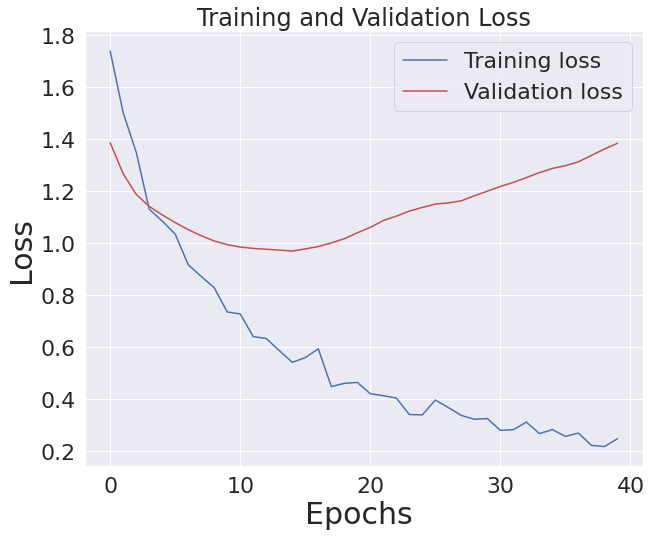

<Figure size 432x288 with 0 Axes>

In [660]:
plt.figure(figsize=(10,8))
plt.plot(range(len(training_loss)), training_loss, 'b', label='Training loss') #plotting training loss
plt.plot(range(len(testing_loss)), testing_loss, 'r', label='Validation loss') # plotting validation loss
plt.title('Training and Validation Loss')
plt.xlabel('Epochs ',fontsize=30)
plt.ylabel('Loss',fontsize=30)
plt.legend()
plt.figure()
plt.show()

### Cut Off Model At 13 Epochs

In [671]:
# An instance of a sequential neural; an empty model
model = tf.keras.Sequential()

In [672]:
model.add(hub_layer)
model.add(tf.keras.layers.Dense(32, activation = 'relu'))
model.add(tf.keras.layers.Dropout(.7))
model.add(tf.keras.layers.Dense(32, input_dim = 4, activation = 'relu'))
model.add(tf.keras.layers.Dense(4, activation = 'softmax'))

In [673]:
model.compile(optimizer= 'adam', loss = tf.keras.losses.CategoricalCrossentropy(from_logits=True), metrics = ['accuracy'])

In [674]:
model.summary()

Model: "sequential_67"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
keras_layer_6 (KerasLayer)   (None, 20)                400020    
_________________________________________________________________
dense_194 (Dense)            (None, 32)                672       
_________________________________________________________________
dropout_58 (Dropout)         (None, 32)                0         
_________________________________________________________________
dense_195 (Dense)            (None, 32)                1056      
_________________________________________________________________
dense_196 (Dense)            (None, 4)                 132       
Total params: 401,880
Trainable params: 401,880
Non-trainable params: 0
_________________________________________________________________


In [675]:
history = model.fit(X_train, y_train_hot, epochs = 13, validation_split=0.3, verbose=1)

Epoch 1/13


/usr/local/lib/python3.7/dist-packages/keras/backend.py:4847: UserWarning: "`categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a sigmoid or softmax activation and thus does not represent logits. Was this intended?"
  '"`categorical_crossentropy` received `from_logits=True`, but '


9/9 [==============================] - 1s 37ms/step - loss: 1.6135 - accuracy: 0.3035 - val_loss: 1.2571 - val_accuracy: 0.4865
Epoch 2/13
9/9 [==============================] - 0s 13ms/step - loss: 1.3407 - accuracy: 0.4047 - val_loss: 1.1518 - val_accuracy: 0.5586
Epoch 3/13
9/9 [==============================] - 0s 11ms/step - loss: 1.1558 - accuracy: 0.5175 - val_loss: 1.1071 - val_accuracy: 0.5766
Epoch 4/13
9/9 [==============================] - 0s 12ms/step - loss: 1.0446 - accuracy: 0.5759 - val_loss: 1.0796 - val_accuracy: 0.5766
Epoch 5/13
9/9 [==============================] - 0s 10ms/step - loss: 0.9208 - accuracy: 0.5837 - val_loss: 1.0573 - val_accuracy: 0.5766
Epoch 6/13
9/9 [==============================] - 0s 12ms/step - loss: 0.9274 - accuracy: 0.6537 - val_loss: 1.0275 - val_accuracy: 0.6126
Epoch 7/13
9/9 [==============================] - 0s 10ms/step - loss: 0.8018 - accuracy: 0.6693 - val_loss: 1.0048 - val_accuracy: 0.6577
Epoch 8/13
9/9 [======================

### Validation Set

In [676]:
y_preds = model.predict(X_test)
np.round(y_preds, 2)

array([[0.02, 0.05, 0.92, 0.02],
       [0.05, 0.08, 0.82, 0.04],
       [0.  , 0.01, 0.98, 0.01],
       [0.03, 0.04, 0.91, 0.02],
       [0.14, 0.27, 0.44, 0.16],
       [0.22, 0.24, 0.37, 0.17],
       [0.  , 0.01, 0.98, 0.  ],
       [0.47, 0.33, 0.16, 0.05],
       [0.07, 0.12, 0.74, 0.06],
       [0.42, 0.21, 0.35, 0.02],
       [0.17, 0.33, 0.3 , 0.2 ],
       [0.  , 0.01, 0.99, 0.  ],
       [0.22, 0.35, 0.26, 0.18],
       [0.07, 0.1 , 0.79, 0.04],
       [0.  , 0.  , 1.  , 0.  ],
       [0.  , 0.01, 0.99, 0.  ],
       [0.13, 0.26, 0.53, 0.07],
       [0.02, 0.04, 0.93, 0.01],
       [0.07, 0.11, 0.8 , 0.03],
       [0.  , 0.  , 0.99, 0.  ],
       [0.31, 0.14, 0.41, 0.14],
       [0.54, 0.31, 0.09, 0.06],
       [0.24, 0.48, 0.25, 0.03],
       [0.3 , 0.26, 0.33, 0.1 ],
       [0.  , 0.01, 0.99, 0.  ],
       [0.14, 0.28, 0.44, 0.14],
       [0.02, 0.06, 0.9 , 0.03],
       [0.13, 0.17, 0.63, 0.07],
       [0.02, 0.04, 0.92, 0.02],
       [0.1 , 0.14, 0.66, 0.1 ],
       [0.

In [677]:
y_pred = []
for row in y_preds:
  for node, score in enumerate(row):
    if score == max(row):
      y_pred.append(node+1)

In [678]:
from sklearn.metrics import accuracy_score

In [679]:
accuracy_score(y_test, y_pred)

0.5949367088607594

# Summary